## Calculation of  various properties of a matrix

In [1]:
def s_um(mat):
    if isinstance(mat[0],list):
        l=[];
        for i in range(len(mat)):
            for j in range(len(mat[i])):
                l.append(mat[i][j])    
    else:
        l=mat;
    s=sum(l)
    return s 

def m_ax(mat):
    if isinstance(mat[0],list):
        l=[];
        for i in range(len(mat)):
            for j in range(len(mat[i])):
                l.append(mat[i][j])    
    else:
        l=mat;
    maximum=max(l)
    return maximum

def m_ean(mat):
    if isinstance(mat[0],list):
        l=[];
        for i in range(len(mat)):
            for j in range(len(mat[i])):
                l.append(mat[i][j])    
    else:
        l=mat;
    mean=s_um(l)/len(l)
    return mean

def m_edian(mat):
    if isinstance(mat[0],list):
        l=[];
        for i in range(len(mat)):
            for j in range(len(mat[i])):
                l.append(mat[i][j])
        l.sort();
        if len(l)%2==0:
            med=m_ean([l[int(len(l)/2)],l[int(len(l)/2)-1]])
        else:
            med=l[int((len(l)+1)/2)]
    
    else:
        mat.sort()
        if len(mat)%2==0:
            med=(mat[int(len(mat)/2)]+mat[int((len(mat)/2)-1)])/2
        else:
            med=mat[int((len(mat)+1)/2)]
    return med

def freq_dis(mat):
    d={};
    if isinstance(mat[0],list):
        l=[];
        for i in range(len(mat)):
            for j in range(len(mat[i])):
                l.append(mat[i][j])    
    else:
        l=mat;
    for i in range(len(l)):        
        d[l[i]]=l.count(l[i])
    return d


def m_ode(mat):
    d=freq_dis(mat)
    mode=max(d,key=d.get)
    return mode

def v_ariance(mat):
    if isinstance(mat[0],list):
        l=[];
        for i in range(len(mat)):
            for j in range(len(mat[i])):
                l.append(mat[i][j])    
    else:
        l=mat;
    mean=m_ean(l)
    v=sum([(i-mean)*(i-mean) for i in l])/len(l)
    return v

def std(mat):
    return (v_ariance(mat))**(1/2)

In [2]:
mat=[[1,3,1,6,8],[1,2,1,6,8], [0,0,4,8,4], [2,6,0,16,18], [0,0,1,2,2]]
print("sum=",s_um(mat))
print("mean=",m_ean(mat))
print("median=",m_edian(mat))
print("mode=",m_ode(mat))
print("max=",m_ax(mat))
print("frequency distribution=",freq_dis(mat))
print("standard deviation=",std(mat))
print("variance=",v_ariance(mat))

sum= 100
mean= 4.0
median= 2
mode= 1
max= 18
frequency distribution= {1: 5, 3: 1, 6: 3, 8: 3, 2: 4, 0: 5, 4: 2, 16: 1, 18: 1}
standard deviation= 4.656178690729126
variance= 21.68


## Properties calculation from user defined input matrix

In [3]:
s=int(input("Enter the size: "))
import random
mat=[[0]*s]*s

for i in range(s):
    mat[i]=random.choices(range(0,10), k=s)
    
print(mat) 

Enter the size: 5
[[1, 0, 8, 0, 6], [4, 1, 3, 8, 1], [2, 1, 9, 6, 9], [6, 6, 8, 5, 8], [5, 4, 7, 3, 4]]


In [4]:
print("sum=",s_um(mat))
print("mean=",m_ean(mat))
print("median=",m_edian(mat))
print("mode=",m_ode(mat))
print("max=",m_ax(mat))
print("frequency distribution=",freq_dis(mat))
print("standard deviation=",std(mat))
print("variance=",v_ariance(mat))

sum= 115
mean= 4.6
median= 5
mode= 1
max= 9
frequency distribution= {1: 4, 0: 2, 8: 4, 6: 4, 4: 3, 3: 2, 2: 1, 9: 2, 5: 2, 7: 1}
standard deviation= 2.870540018881465
variance= 8.240000000000002


## Addition of noises to image and observing the improvement with increasing sets of images for avergaing

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display(img):
    plt.figure(figsize = (50,5))
    plt.imshow(img, cmap = 'gray')

In [6]:
def salt_and_pepper(img, noise_ratio, n_set):
    
    avg = np.zeros(img.shape)
    amount = int(noise_ratio * img.size) 
    
    for i in range(n_set):
        img_noise = img.copy()
        x_salt, y_salt = [np.random.randint(0, i - 1, amount)
                  for i in img.shape]
        img_noise[(x_salt,y_salt)] = 255

        x_pepper, y_pepper = [np.random.randint(0, i - 1, amount)
                  for i in img.shape]
        img_noise[(x_pepper,y_pepper)] = 0
        
        avg += img_noise
    avg = avg/n_set
    avg = avg.astype(int)
    avg = np.clip(avg, 0, 255)
    return avg
    
    
def gaussian(img, n_set):
    
    mean = 50
    var = 10000
    sigma = var ** 0.5
    avg = np.zeros(img.shape)
    
    for i in range(n_set):
        gauss = np.random.normal(mean,sigma,(img.shape[0],img.shape[1]))
        avg = avg + img + gauss
    
    avg = avg/n_set
    avg = avg.astype(int)
    avg = np.clip(avg, 0, 255)
    return avg

        
def speckle(img, n_set):
    
    avg = np.zeros(img.shape)
    
    for i in range(n_set):
        speckle = np.random.randn(img.shape[0], img.shape[1])*100
        avg = avg + img + speckle
    
    avg = avg/n_set
    avg = avg.astype(int)
    avg = np.clip(avg, 0, 255)
    return avg

In [7]:
image = cv2.imread('lena.png')
b, g, r = cv2.split(image)
gray_img = (0.3 * r) + (0.59 * g) + (0.11 * b)

gauss_display = gray_img.copy()
salt_pepper_display = gray_img.copy()
speckle_display = gray_img.copy()

for n_set in [5,10,15,20,25,30]:
    gauss_display = np.concatenate((gauss_display, gaussian(gray_img, n_set)), axis = 1)
    salt_pepper_display = np.concatenate((salt_pepper_display, salt_and_pepper(gray_img, 0.1, n_set)), axis = 1)
    speckle_display = np.concatenate((speckle_display, speckle(gray_img, n_set)), axis = 1)

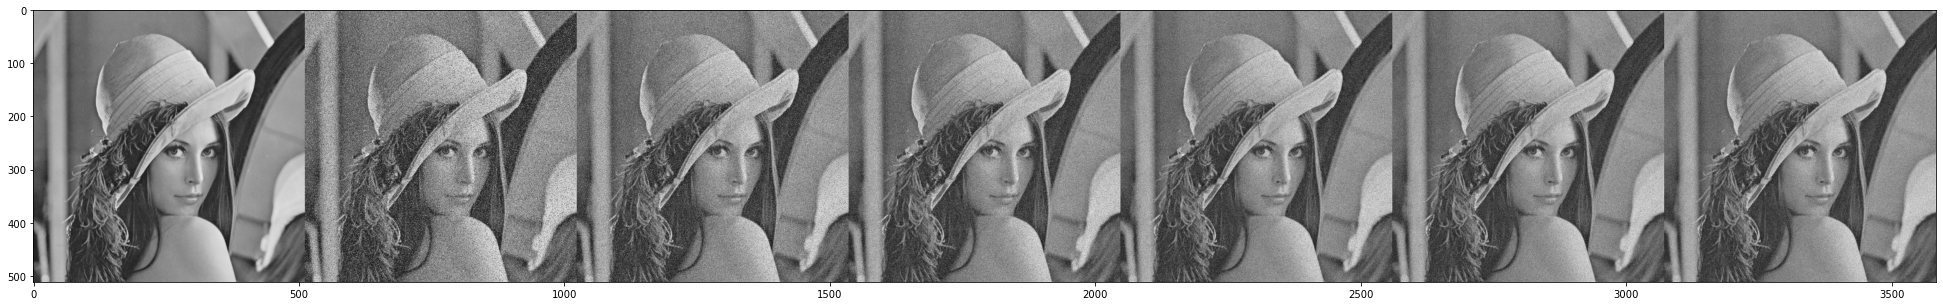

In [8]:
display(salt_pepper_display)

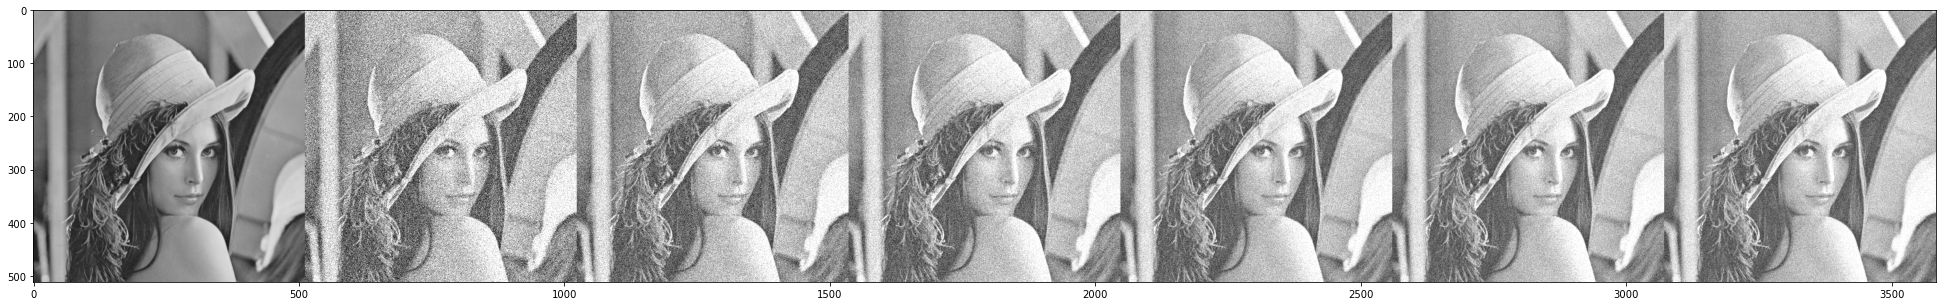

In [9]:
display(gauss_display)

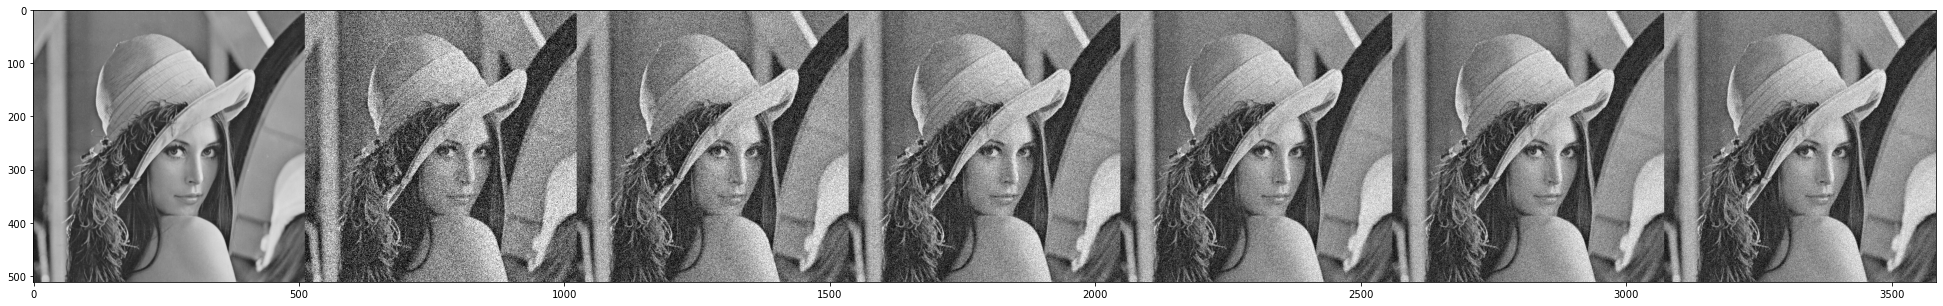

In [10]:
display(speckle_display)

In the above images, the first image is the original image and the rest of the images averages of sets of 5, 10, 15, 20, 25, 30 respectively. We can observe that as the number of images in a set increases, after taking average, the output image quality increases (noise decreases).

## Scaling of image using bilinear interpolation and comparison with in-built function

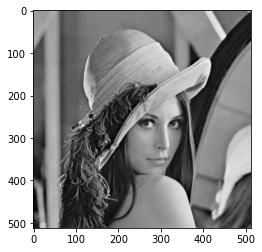

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gray_img = cv2.imread("lena.png",0)
plt.imshow(gray_img, cmap = 'gray')

In [13]:
def scale_img(scaling_factor, f):
    f_i=np.arange(f.shape[0])  #f is the input image and i and j are its indicies
    f_j=np.arange(f.shape[1])


    s_i=np.floor(f_i*scaling_factor).astype(int) #s_i and s_j contains the indicies of the output image for which interpolation is not required
    s_j=np.floor(f_j*scaling_factor).astype(int)


    g=np.ones((s_i[-1]+1,s_j[-1]+1)) #g is the output image, ie scaled image

    g_i=np.arange(g.shape[0])  #g is the input image and i and j are its indicies
    g_j=np.arange(g.shape[1])

#placing pixel values of f into g where no interpolation is required
    for i in f_i:
        for j in f_j:
            g[s_i[i]][s_j[j]]=f[i][j]

#calculating pixels values for g where interpolation is required
    for i in g_i:
        for j in g_j:
            if i not in s_i or j not in s_j:
                m=[np.max(s_i[s_i<=i]),np.min(s_i[s_i>=i])]
                n=[np.max(s_j[s_j<=j]),np.min(s_j[s_j>=j])] #the cartesian product of m and n will be four coordinaties which is used for interpolation
         
                if m[0]==m[1]:
                    if m[0]==s_i[0]:
                        m[1]=np.min(s_i[s_i>i])
                    else:
                        m[0]=np.max(s_i[s_i<i])      #conditions for boundary cases
                if n[0]==n[1]:
                    if n[0]==s_j[0]:
                        n[1]=np.min(s_j[s_j>j])
                    else:
                        n[0]=np.max(s_j[s_j<j])
                g[i][j]=((g[m[0]][n[0]]*np.abs((m[1]-i)*(n[1]-j)))+(g[m[0]][n[1]]*np.abs((m[1]-i)*(n[0]-j)))+(g[m[1]][n[0]]*np.abs((m[0]-i)*(n[1]-j)))+(g[m[1]][n[1]]*np.abs((m[0]-i)*(n[0]-j))))/np.abs((m[1]-m[0])*(n[1]-n[0]))
    plt.imshow(g,cmap="gray")
    return g

In [11]:
def resize_inbuilt(scale, image):
    height = int(gray_img.shape[0]*scale)
    width = int(gray_img.shape[1]*scale)
    dimension = height, width
    resize = cv2.resize(gray_img, dimension, interpolation = cv2.INTER_LINEAR)
    return resize

Enter scaling factor: 0.5


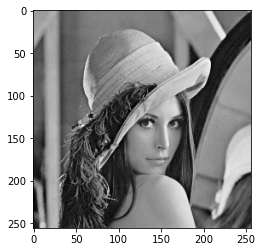

In [14]:
scaling_factor = float(input("Enter scaling factor: "))
g = scale_img(scaling_factor, gray_img)

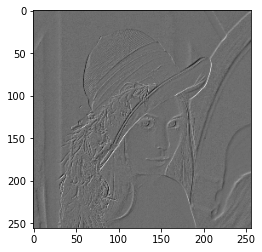

In [16]:
# Built-in scaled by 0.5
resize_0_5 = resize_inbuilt(0.5, gray_img)
# Comparison
plt.imshow(resize_0_5 - g, cmap = 'gray')

Enter scaling factor: 2


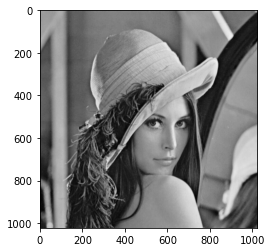

In [20]:
scaling_factor = float(input("Enter scaling factor: "))
g = scale_img(scaling_factor, gray_img)

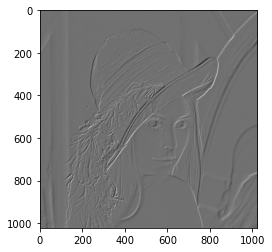

In [25]:
# Built-in scaled by 2
resize_2 = resize_inbuilt(2, gray_img)
resize_2 = resize_2[:-1, :-1]
# Comparison
plt.imshow(resize_2 - g, cmap = 'gray')

We can observe that there is difference between the manually scaled and in-built function scaled images along the edges. This may be due different calculations or additional noise suppression that OpenCV considers while interpolating. This may also arise due to the ambiguity that arises because of the extra pixel rows and columns along the image's edges (Due to this the image may be shifted by a pixel or two, thus giving strong edge differences).

## Calculation of angle of inclination of 'leaning tower of pisa' using rotation with help of bilinear interpolation

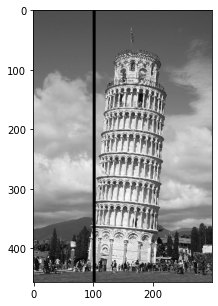

In [15]:
tower_img = cv2.imread('leaning_tower.jpeg', 0)
tower_img = cv2.resize(tower_img, None, fx = .25, fy = .25, interpolation = cv2.INTER_LINEAR)
img_ref = tower_img.copy()
img_ref[0 : tower_img.shape[0], tower_img.shape[1]//3 : (tower_img.shape[1]//3 + 5)] = 0

display(img_ref)

In [16]:
def rotate(img, angle):

    matrix_1 = np.array([[np.cos(angle), -1 * np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    print(matrix_1)
    matrix_2 = np.linalg.inv(matrix_1)
    rotated_img = np.ones((img.shape[0], img.shape[1])) * -1

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):    
            x, y = np.dot(matrix_1, np.array([col, row]))
            x = int(np.round(x))
            y = int(np.round(y))            
            
            if x >= 0 and y >= 0 and x < img.shape[1] and y < img.shape[0] :
                rotated_img[y][x] = img[row][col]
                
    for row in range(img.shape[0]):
        for col in range(img.shape[1]): 
            if rotated_img[row][col] == -1 :
                x, y = np.dot(matrix_2, np.array([col, row]))
                if x >= 0 and y >= 0 and x < img.shape[1] - 1 and y < img.shape[0] - 1 : 
                    ltx, lty = np.array([int(np.floor(x)), int(np.floor(y))])  #left_top_x,y
                    rtx, rty = np.array([int(np.floor(x)), int(np.ceil(y))])   #right_top_x,y
                    lbx, lby = np.array([int(np.ceil(x)), int(np.floor(y))])   #left_bottom_x,y
                    rbx, rby = np.array([int(np.ceil(x)), int(np.ceil(y))])    #tight_bottom_x,y
                    try:
                        rotated_img[row][col] = ((img[ltx, lty]*(rbx-x)*(rby-y))+(img[rtx, rty]*(x-lbx)*(lby-y))
                                          + (img[lbx, lby]*(rtx-x)*(y-rty))+(img[rbx, rby]*(x-ltx)*(y-lty)))
                    except:
                        pass
    return rotated_img

[[ 0.9945219   0.10452846]
 [-0.10452846  0.9945219 ]]


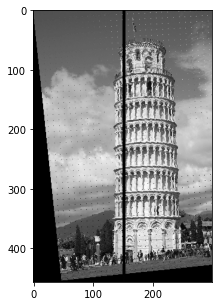

In [17]:
deg = -6
rotated_img = rotate(tower_img, (deg * np.pi) / 180)
rotated_img[0 : rotated_img.shape[0], rotated_img.shape[1]//2 : (rotated_img.shape[1]//2 + 5)] = 0
display(rotated_img)

The angle of inclination using rotations is found to be 6 degrees.

## Histogram Equilization

In [18]:
def histogram(img):
    histogram = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            histogram[img[i][j]] += 1
    return histogram

In [19]:
def hist_eq(img, x, cdf):
    pixel_eq = ((cdf[x] - min(cdf))/img.size - min(cdf)) * 255
    return round(pixel_eq)

In [20]:
pout_img = cv2.imread('pout-dark.jpg', 0)
y = histogram(pout_img).astype(int)

In [21]:
cdf = np.zeros(256) 
for i in range(256):
    cdf[i] = y[i] + cdf[i-1]
    
cdf = cdf.astype(int)    

In [22]:
pout_img_eq = np.zeros(pout_img.shape)
for i in range(pout_img.shape[0]):
        for j in range(pout_img.shape[1]):
            pout_img_eq[i][j] = hist_eq(pout_img, pout_img[i][j], cdf)

In [23]:
output_display = np.concatenate((pout_img, pout_img_eq), axis = 1)

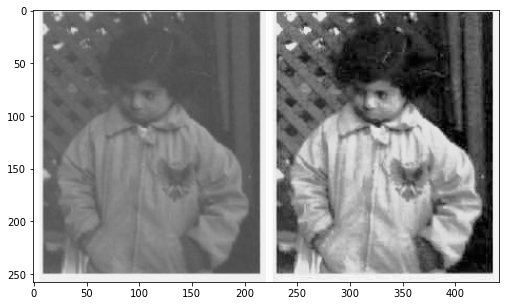

In [24]:
plt.figure(figsize = (10,5))
plt.imshow(output_display, cmap = 'gray')

We can observe that from histogram equalization, we get contrast version of pout-dark image.

## Histogram Matching

In [25]:
# Reading input and ref image
input_img = cv2.imread('pout-dark.jpg', 0)
ref_img = cv2.imread('pout-bright.jpg', 0)
print(input_img.shape, ref_img.shape)

(258, 221) (261, 221)


In [26]:
# Creating histogram for input and ref image
hist_img = histogram(input_img).astype(int)
hist_ref = histogram(ref_img).astype(int)

# Calculating CDF for input image
cdf_input = np.zeros(256)
for i in range(256):
    cdf_input[i] = hist_img[i] + cdf_input[i-1]
       
cdf_input = cdf_input.astype(int)

# Calculating CDF for ref image
cdf_ref = np.zeros(256)
for i in range(256):
    cdf_ref[i] = hist_ref[i] + cdf_ref[i-1]
    
cdf_ref = cdf_ref.astype(int)

In [27]:
# Equalizing input image cdf
input_eq = np.zeros(input_img.shape)
input_eq = ((cdf_input - min(cdf_input))/(input_img.size - min(cdf_input))) * 255
input_eq = (input_eq).astype(int)

# Equalizing ref image cdf
ref_eq = np.zeros(ref_img.shape)
ref_eq = ((cdf_ref - min(cdf_ref))/(ref_img.size - min(cdf_ref))) * 255
ref_eq = (ref_eq).astype(int)            

In [28]:
g = np.ones(256)*-1
for index, i in enumerate(cdf_input):
    g[index] = np.argmin(abs(cdf_ref - i))
        
img_match = input_img.copy()
for i in range(img_match.shape[0]):
    for j in range(img_match.shape[1]):
        img_match[i][j] = g[input_img[i][j]]


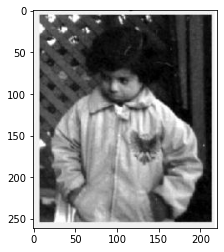

In [29]:
plt.imshow(ref_img, cmap = 'gray') # reference image - pout-bright

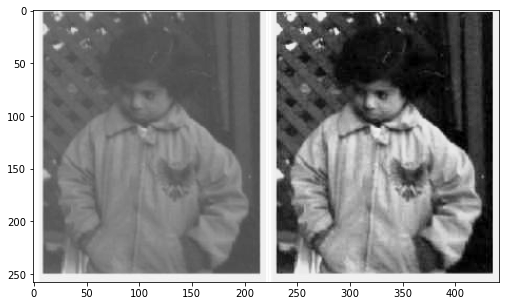

In [30]:
img_matching = np.concatenate((input_img, img_match), axis = 1) # pout-dark and matched pout_dark
plt.figure(figsize = (15,5))
plt.imshow(img_matching, cmap = 'gray')

From the above comparison we can conclude that our pout-dark image is matched with the given pout-bright image.